# Filtering

In [1]:
from filtering import *

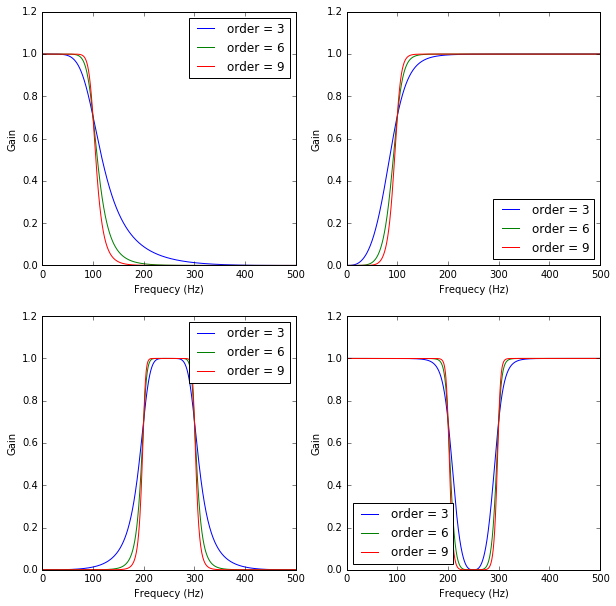

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import freqz    # Computes the frequency response of a digital filter

sampling_freq = 1000
cutoff_freq = 100

low_cutoff_freq = 200
high_cutoff_freq = 300

fig = plt.figure(figsize=(10, 10))
fig.clear

for order in [3, 6, 9]:
    b, a = butter_lowpass (cutoff_freq, sampling_freq, order)
    w, h = freqz(b, a, worN=1024)
    fig.add_subplot(221, xlabel="Frequecy (Hz)", ylabel="Gain")
    plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h), label="order = {}".format(order))
    plt.legend(loc="best")
    
    b, a = butter_highpass (cutoff_freq, sampling_freq, order)
    w, h = freqz(b, a, worN=1024)
    fig.add_subplot(222, xlabel="Frequecy (Hz)", ylabel="Gain")
    plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h), label="order = {}".format(order))
    plt.legend(loc="best")
    
    b, a = butter_bandpass (low_cutoff_freq, high_cutoff_freq, sampling_freq, order)
    w, h = freqz(b, a, worN=1024)
    fig.add_subplot(223, xlabel="Frequecy (Hz)", ylabel="Gain")
    plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h), label="order = {}".format(order))
    plt.legend(loc="best")
    
    b, a = butter_bandstop (low_cutoff_freq, high_cutoff_freq, sampling_freq, order)
    w, h = freqz(b, a, worN=1024)
    fig.add_subplot(224, xlabel="Frequecy (Hz)", ylabel="Gain")
    plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h), label="order = {}".format(order))
    plt.legend(loc="best")

/home/peaceful/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


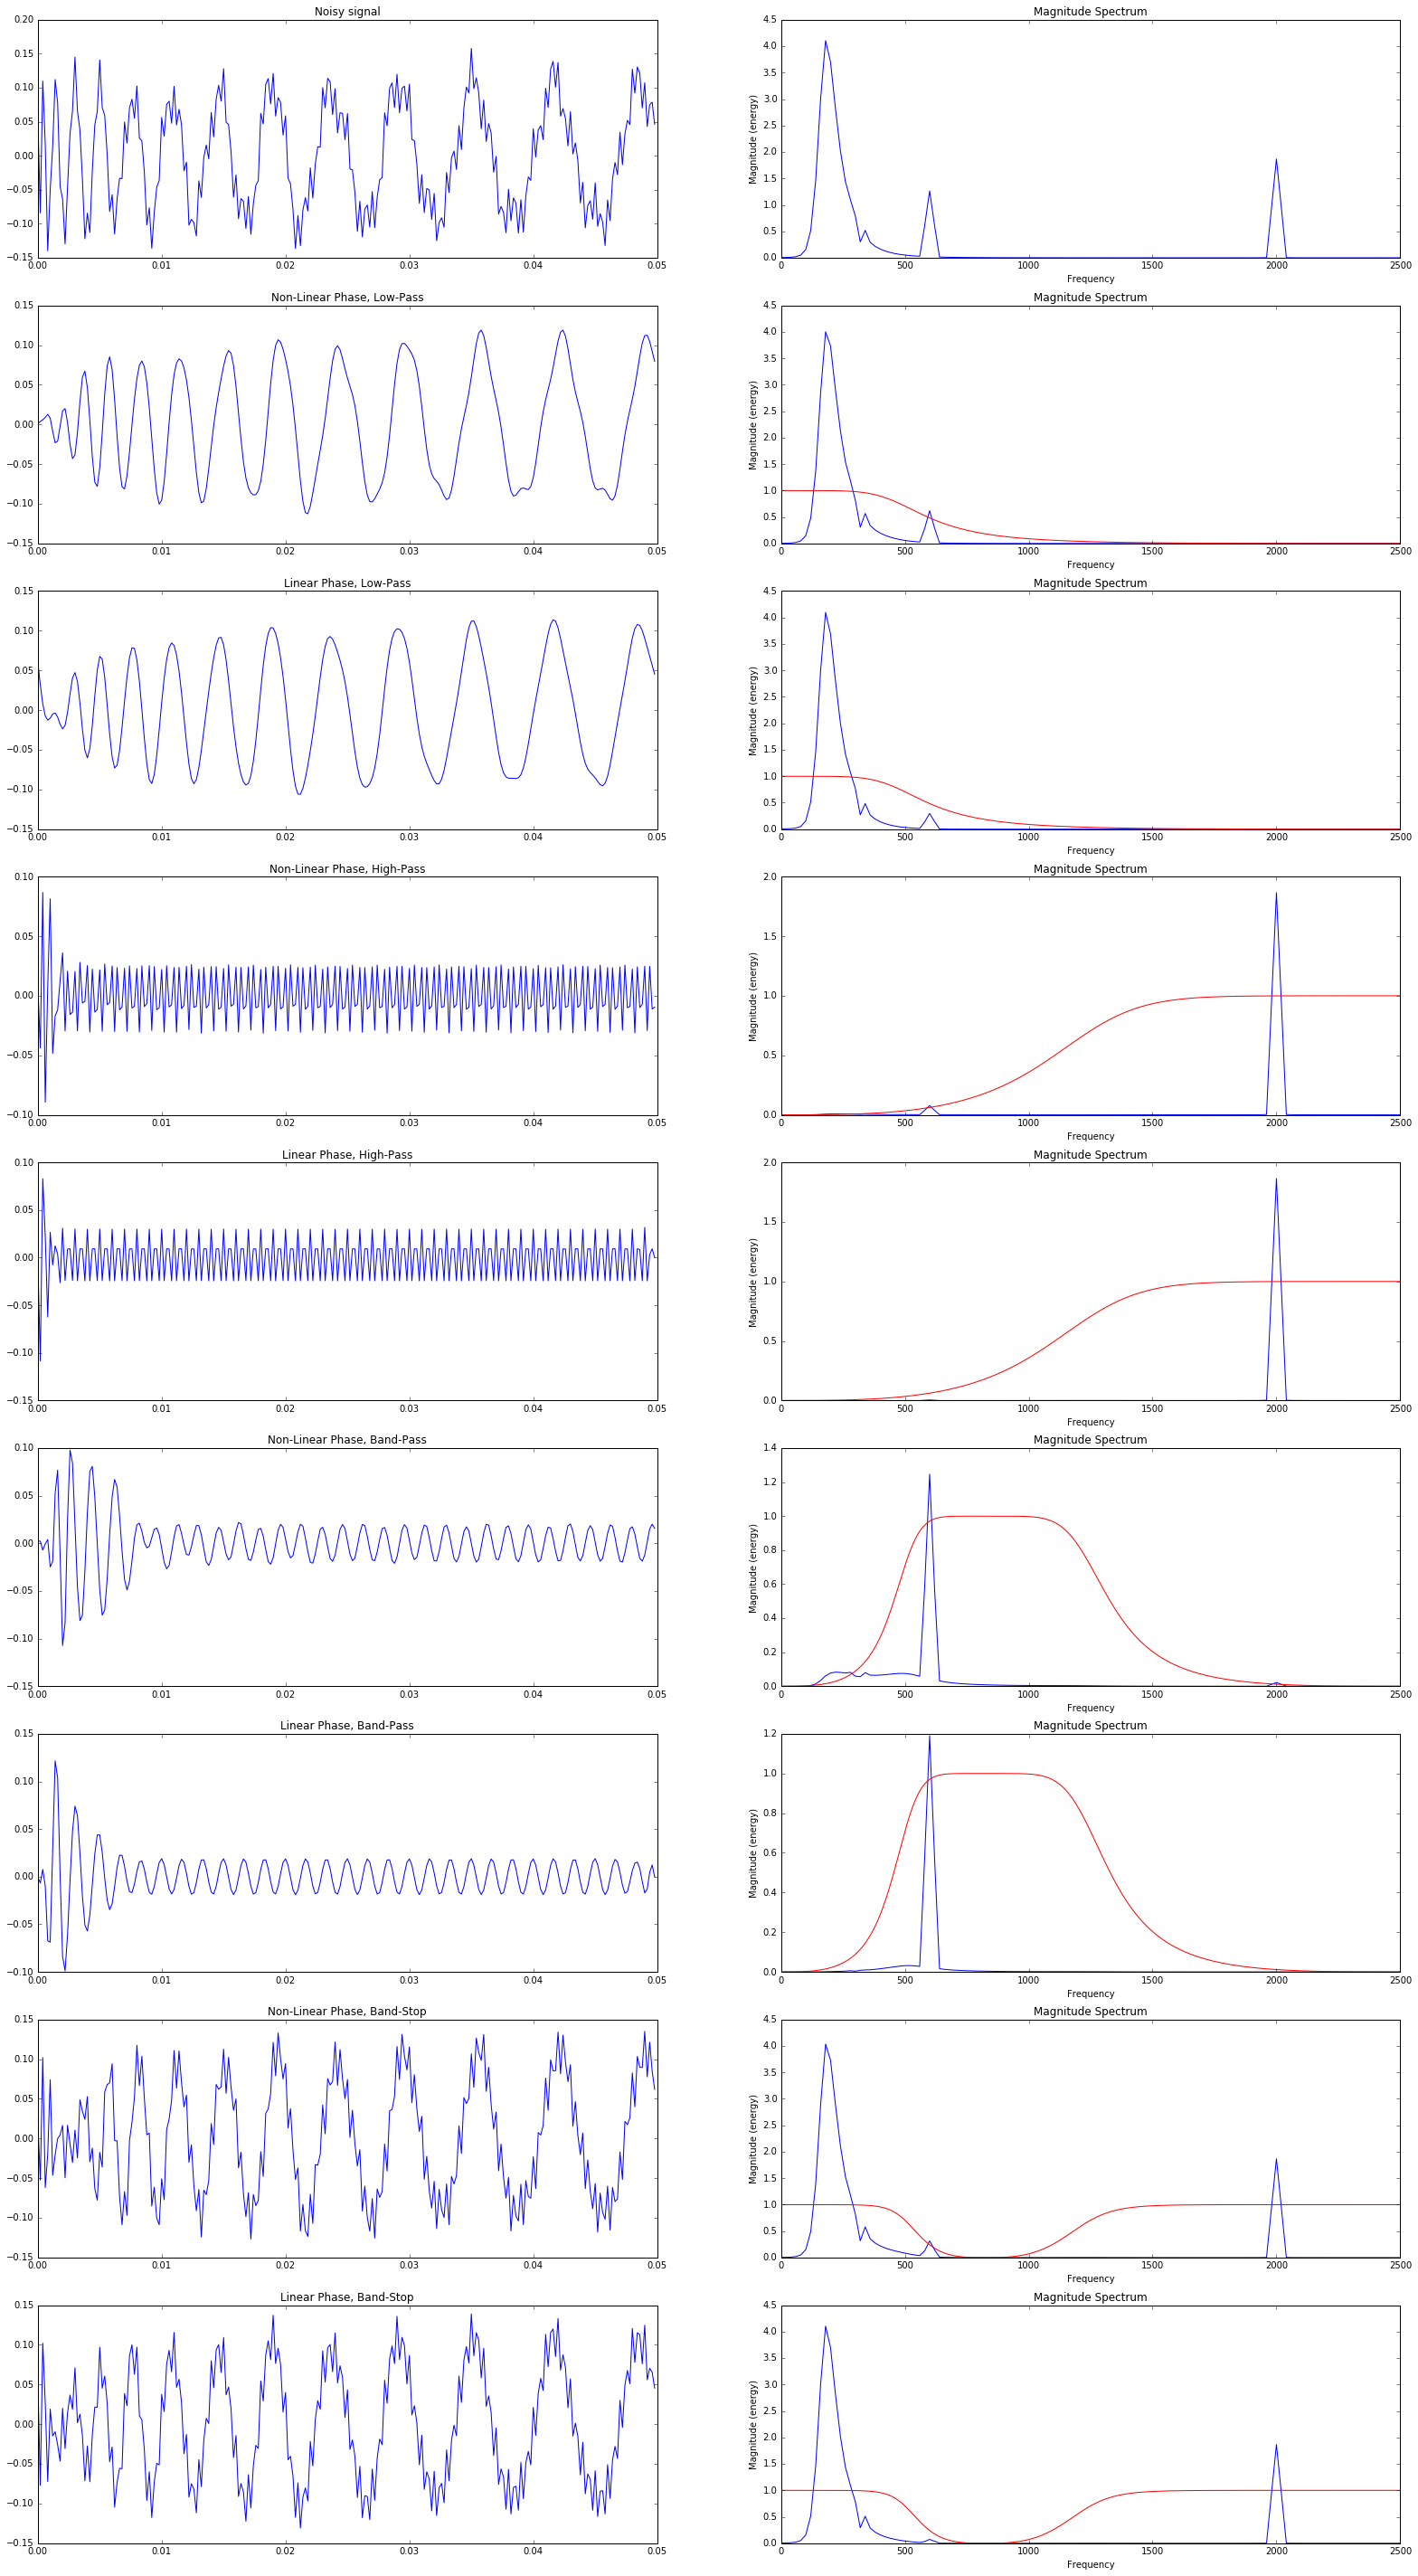

In [3]:
import numpy as np

T = 0.05    # Seconds
sampling_freq = 5000.0
n_samples = T * sampling_freq

low_cutoff_freq = 500.0
high_cutoff_freq = 1250.0

t = np.linspace (0.0, T, n_samples, endpoint=False)
a = 0.02  # Amplitude
f0 = 600.0                                          # Signal frequency

x = 0.1 * np.sin(2 * np.pi * 60 * np.sqrt(t))      # Noise at 60 Hz
x += 0.01 * np.cos(2 * np.pi * 312.0 * t + 0.1)     # Noise at 312 Hz
x += a * np.cos(2 * np.pi * f0 * t + .11)           # Original signal
x += 0.03 * np.cos(2 * np.pi * 2000.0 * t)          # Noise at 2000 Hz

fig = plt.figure(figsize=(27, 50))
fig.clear()

fig.add_subplot(921, title="Noisy signal")
plt.plot(t, x)

fig.add_subplot(922, title="Magnitude Spectrum")
plt.magnitude_spectrum(x, sampling_freq)

order = 3



# LOWPASS
b, a = butter_lowpass (low_cutoff_freq, sampling_freq, order)

y = apply_butter (x, b, a)
fig.add_subplot(923, title="Non-Linear Phase, Low-Pass")
plt.plot(t, y)
fig.add_subplot(924, title="Magnitude Spectrum")
plt.magnitude_spectrum(y, sampling_freq)
w, h = freqz(b, a, worN=1024)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h), color="r")

y = apply_butter (x, b, a, linear_phase=True)
fig.add_subplot(925, title="Linear Phase, Low-Pass")
plt.plot(t, y)
fig.add_subplot(926, title="Magnitude Spectrum")
plt.magnitude_spectrum(y, sampling_freq)
w, h = freqz(b, a, worN=1024)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h), color="r")


# HIGHPASS
b, a = butter_highpass (high_cutoff_freq, sampling_freq, order)

y = apply_butter (x, b, a)
fig.add_subplot(927, title="Non-Linear Phase, High-Pass")
plt.plot(t, y)
fig.add_subplot(928, title="Magnitude Spectrum")
plt.magnitude_spectrum(y, sampling_freq)
w, h = freqz(b, a, worN=1024)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h), color="r")

y = apply_butter (x, b, a, linear_phase=True)
fig.add_subplot(929, title="Linear Phase, High-Pass")
plt.plot(t, y)
fig.add_subplot(9, 2, 10, title="Magnitude Spectrum")
plt.magnitude_spectrum(y, sampling_freq)
w, h = freqz(b, a, worN=1024)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h), color="r")


# BANDPASS
b, a = butter_bandpass (low_cutoff_freq, high_cutoff_freq, sampling_freq, order)

y = apply_butter (x, b, a)
fig.add_subplot(9, 2, 11, title="Non-Linear Phase, Band-Pass")
plt.plot(t, y)
fig.add_subplot(9, 2, 12, title="Magnitude Spectrum")
plt.magnitude_spectrum(y, sampling_freq)
w, h = freqz(b, a, worN=1024)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h), color="r")

y = apply_butter (x, b, a, linear_phase=True)
fig.add_subplot(9, 2, 13, title="Linear Phase, Band-Pass")
plt.plot(t, y)
fig.add_subplot(9, 2, 14, title="Magnitude Spectrum")
plt.magnitude_spectrum(y, sampling_freq)
w, h = freqz(b, a, worN=1024)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h), color="r")


# BANDSTOP
b, a = butter_bandstop (low_cutoff_freq, high_cutoff_freq, sampling_freq, order)

y = apply_butter (x, b, a)
fig.add_subplot(9, 2, 15, title="Non-Linear Phase, Band-Stop")
plt.plot(t, y)
fig.add_subplot(9, 2, 16, title="Magnitude Spectrum")
plt.magnitude_spectrum(y, sampling_freq)
w, h = freqz(b, a, worN=1024)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h), color="r")

y = apply_butter (x, b, a, linear_phase=True)
fig.add_subplot(9, 2, 17, title="Linear Phase, Band-Stop")
plt.plot(t, y)
fig.add_subplot(9, 2, 18, title="Magnitude Spectrum")
plt.magnitude_spectrum(y, sampling_freq)
w, h = freqz(b, a, worN=1024)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h), color="r")


# plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Loading the Dataset

In [2]:
# Conventional training set
DS1 = ["101", "106", "108", "109", "112", "114", "115", "116", "118", "119", "122",
       "124", "201", "203", "205", "207", "208", "209", "215", "220", "223", "230"]

# Conventional testing set
DS2 = ["100", "103", "105", "111", "113", "117", "121", "123", "200", "202", "210",
       "212", "213", "214", "219", "221", "222", "228", "231", "232", "233", "234"]

In [3]:
import wfdb

In [3]:
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [4]:
# DOWNLOAD

# import os
# wfdb.dl_database("mitdb", os.path.join(os.getcwd(), "mitdb"))

###### Checking the labels

In [121]:
import wfdb

for rec in DS1:
    annotations = wfdb.rdann("mitdb/" + rec, "atr")
    annotations.get_contained_labels()
    print(annotations.contained_labels)
    print()

    label_store symbol                   description
13           13      Q           Unclassifiable beat
8             8      A  Atrial premature contraction
1             1      N                   Normal beat
16           16      |    Isolated QRS-like artifact
28           28      +                 Rhythm change
14           14      ~         Signal quality change

    label_store symbol                        description
1             1      N                        Normal beat
28           28      +                      Rhythm change
14           14      ~              Signal quality change
5             5      V  Premature ventricular contraction

    label_store symbol                            description
6             6      F  Fusion of ventricular and normal beat
8             8      A           Atrial premature contraction
11           11      j         Nodal (junctional) escape beat
5             5      V      Premature ventricular contraction
1             1      N     

### Plotting

###### Normal

In [5]:
sampfrom = 0
sampto = 2000
record = wfdb.rdrecord("mitdb/100", sampfrom=sampfrom, sampto=sampto)    # record = (signals, fields)
annotations = wfdb.rdann("mitdb/100", "atr", sampfrom=sampfrom, sampto=sampto)

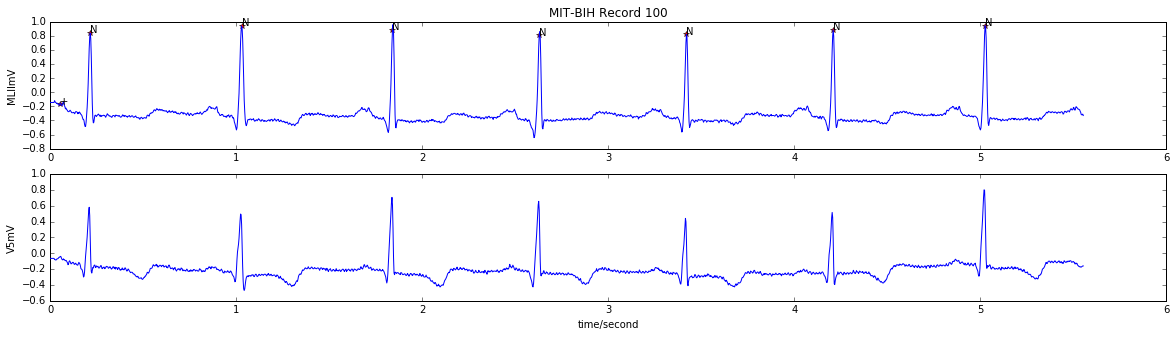

In [6]:
wfdb.plot_wfdb(record=record, annotation=annotations, plot_sym=True,
               figsize=(20, 5), time_units="seconds", title='MIT-BIH Record 100')

###### VEB

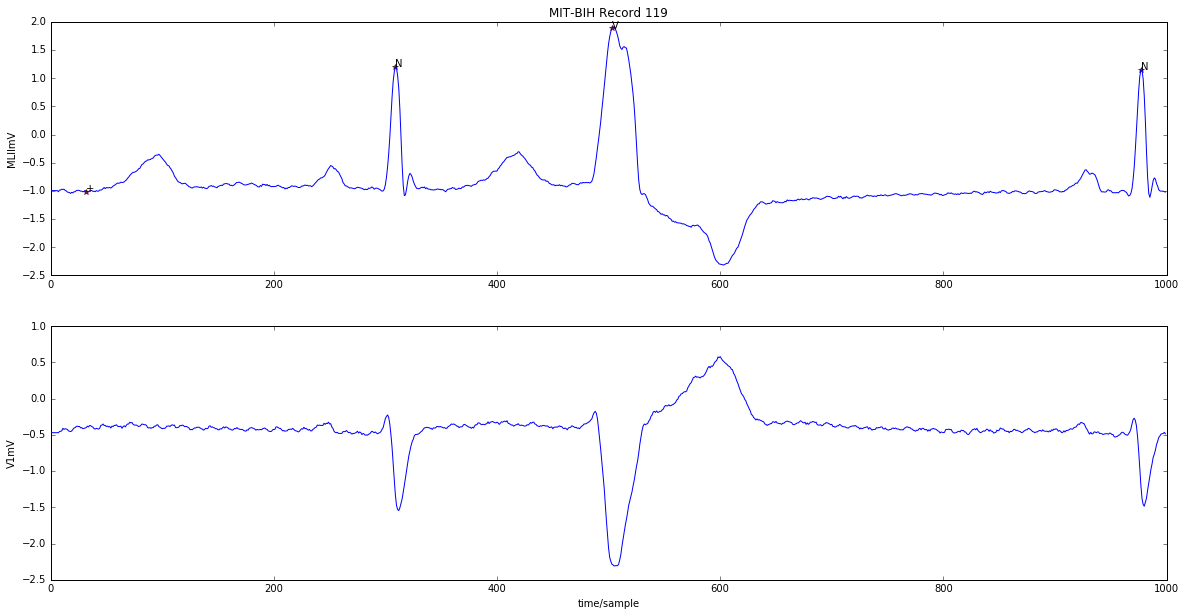

In [260]:
rec_index = "119"
sampfrom = 0
sampto = 1000

record = wfdb.rdrecord("mitdb/" + rec_index, sampfrom=sampfrom, sampto=sampto)    # record = (signals, fields)
annotations = wfdb.rdann("mitdb/" + rec_index, "atr", sampfrom=sampfrom, sampto=sampto)

wfdb.plot_wfdb(record=record, annotation=annotations, plot_sym=True,
               figsize=(20, 10), time_units="samples", title='MIT-BIH Record ' + rec_index)

# Auto-Correlation

In [275]:
def autocorr (x, mode="full"):
    y = np.convolve(x, x, mode)
    return y[int(y.size/2) :] # / y[int(y.size/2)]    # Normalized

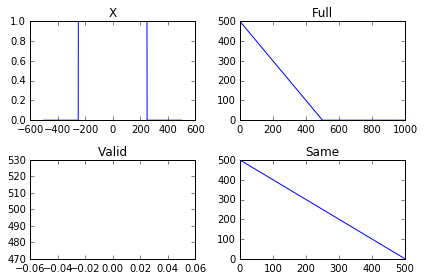

In [276]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

T = 1
fs = 1000
N = T * fs

t = np.linspace (-N/2, N/2, N, endpoint=False)

x = np.concatenate((np.zeros(int(N/4)), np.ones(int(N/2)), np.zeros(int(N/4))))
xx = x[int(N / 2) : int(3 * N / 4)]

y_full = autocorr(x, "full")
y_valid = autocorr(x, "valid")
y_same = autocorr(x, "same")

plt.subplot(221, title="X")
plt.plot(t, x)

plt.subplot(222, title="Full")
plt.plot(y_full)

plt.subplot(223, title="Valid")
plt.plot(y_valid)

plt.subplot(224, title="Same")
plt.plot(y_same)

plt.tight_layout()

In [72]:
print(x.shape)
print(xx.shape)

print(y_full.shape)
print(y_valid.shape)
print(y_same.shape)

(1000,)
(250,)
(1999,)
(1,)
(1000,)


# Checking Feasability (Lag Plotting)

In [7]:
from pandas import Series
from pandas.plotting import lag_plot, autocorrelation_plot

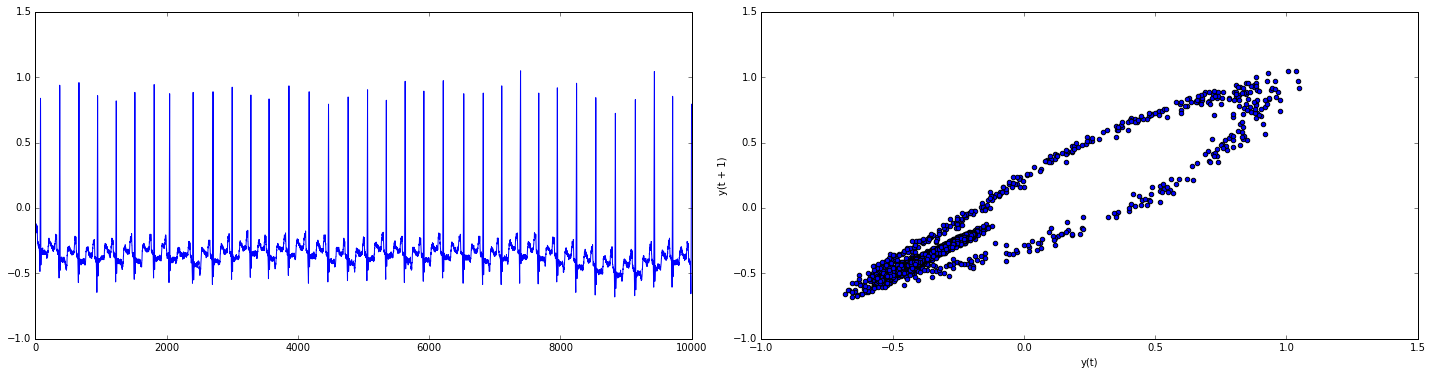

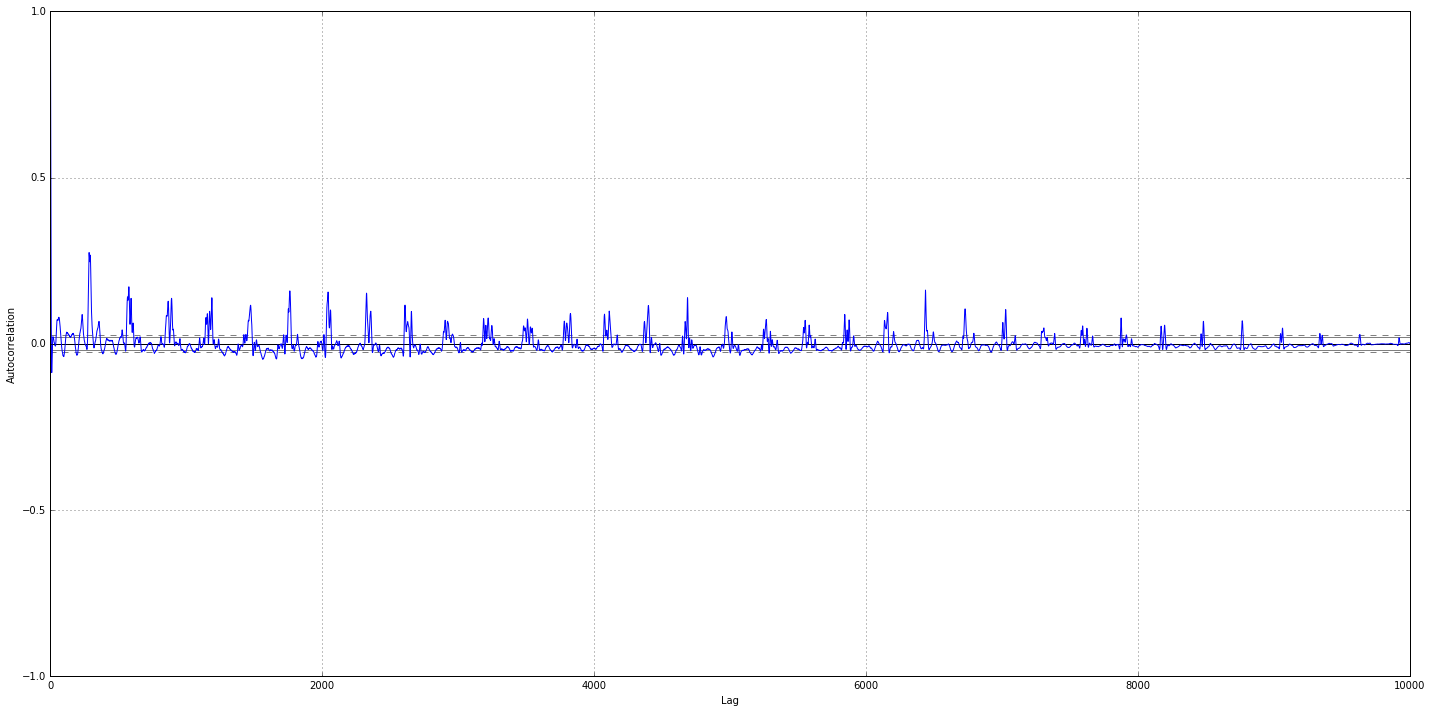

In [18]:
import wfdb

sampfrom = 0
sampto = 10000
record = wfdb.rdrecord("mitdb/100", sampfrom=sampfrom, sampto=sampto)    # record = (signals, fields)

ecg_series = Series(record.p_signal[:, 0])

plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.plot(ecg_series)

plt.subplot(222)
lag_plot(ecg_series, lag=1);
plt.tight_layout()

plt.figure(figsize=(20, 10))
autocorrelation_plot(ecg_series)
plt.tight_layout()

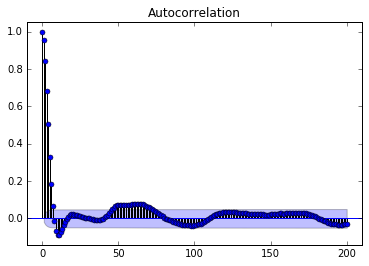

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ecg_series, lags=200);

# a. Preprocessing

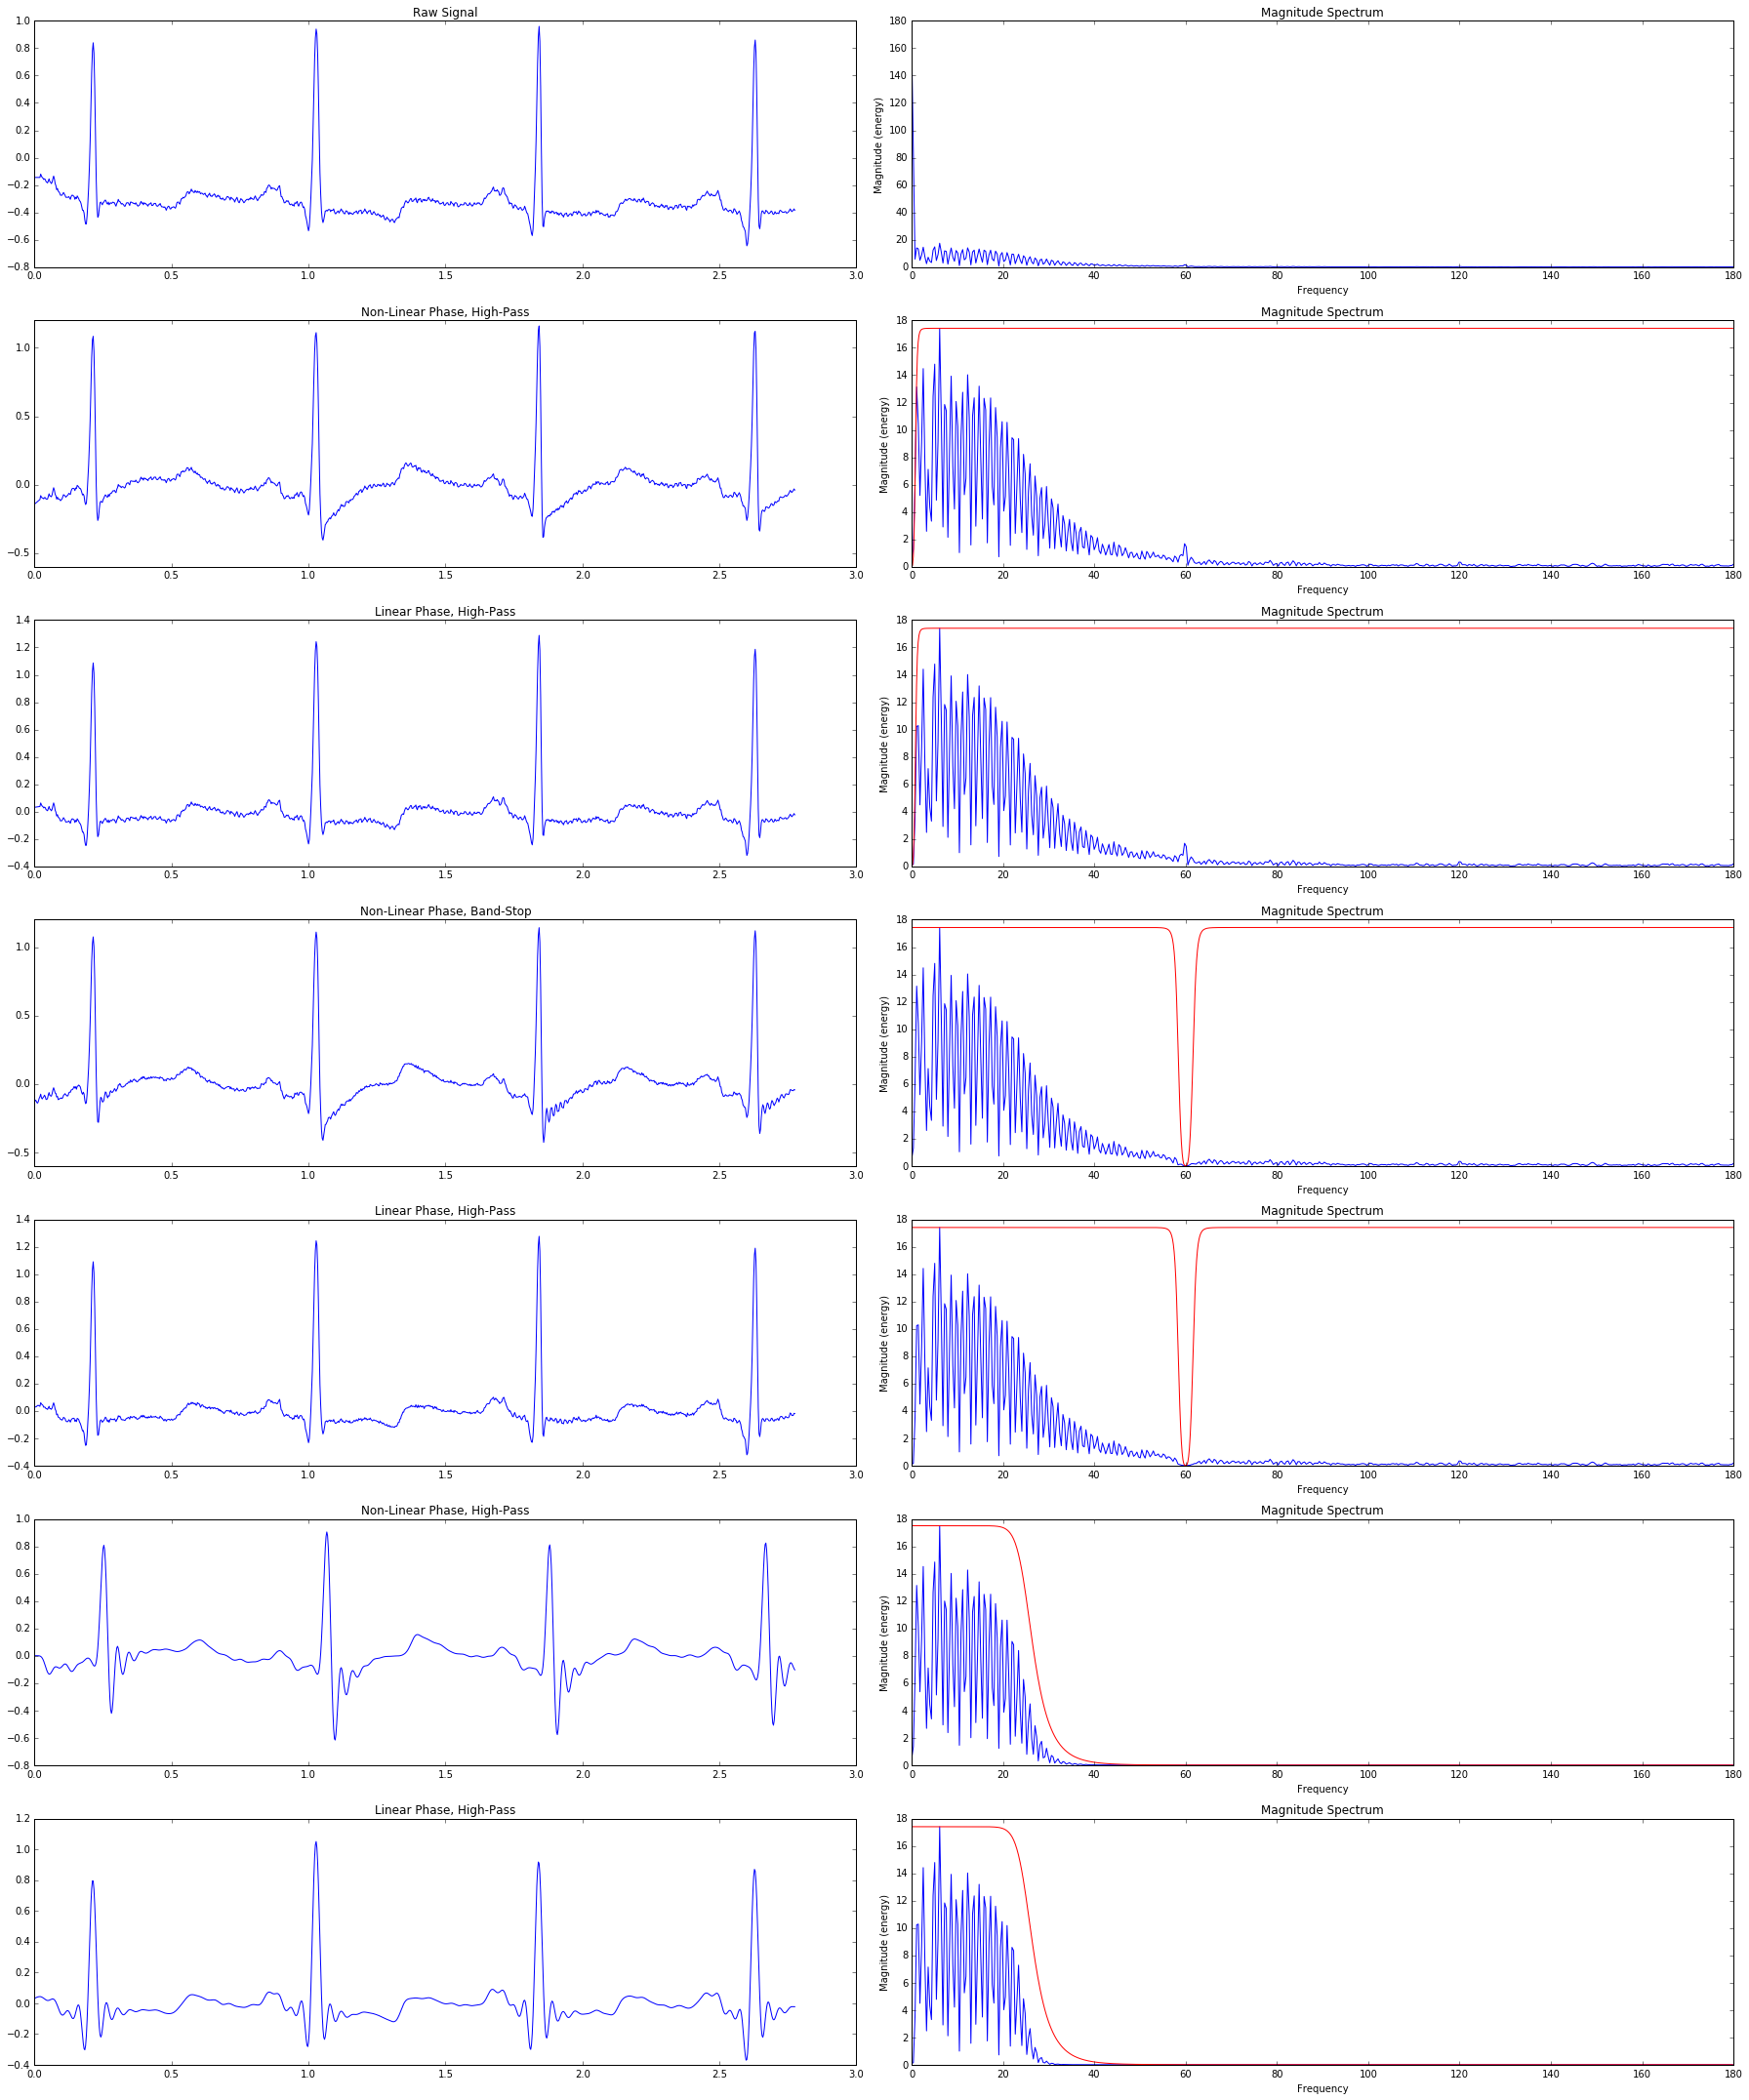

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import freqz    # Computes the frequency response of a digital filter

from filtering import *

import wfdb
sampfrom = 0
sampto = 1000
record = wfdb.rdrecord("mitdb/100", sampfrom=sampfrom, sampto=sampto)    # record = (signals, fields)
annotations = wfdb.rdann("mitdb/100", "atr", sampfrom=sampfrom, sampto=sampto)


x = record.p_signal[:, 0]    # MLII
sampling_freq = record.fs
n_samples = sampto - sampfrom
t = np.linspace (0.0, n_samples / sampling_freq, n_samples, endpoint=False)

fig = plt.figure(figsize=(25, 30))
fig.clear()

fig.add_subplot(721, title="Raw Signal")
plt.plot(t, x)
fig.add_subplot(722, title="Magnitude Spectrum")
plt.magnitude_spectrum(x, sampling_freq)

# HIGHPASS at 1 Hz
cutoff = 1
order = 3

b, a = butter_highpass (cutoff, sampling_freq, order)
w, h = freqz(b, a, worN=1024)

y_11 = apply_butter (x, b, a)
fig.add_subplot(723, title="Non-Linear Phase, High-Pass")
plt.plot(t, y_11)
fig.add_subplot(724, title="Magnitude Spectrum")
spectrum, _, _ = plt.magnitude_spectrum(y_11, sampling_freq)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h) * np.max(spectrum), color="r")

y_12 = apply_butter (x, b, a, linear_phase=True)
fig.add_subplot(725, title="Linear Phase, High-Pass")
plt.plot(t, y_12)
fig.add_subplot(726, title="Magnitude Spectrum")
spectrum, _, _ = plt.magnitude_spectrum(y_12, sampling_freq)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h) * np.max(spectrum), color="r")

# BANDSTOP around 60 Hz
low_cutoff = 58
high_cutoff = 62
order = 3

b, a = butter_bandstop (low_cutoff, high_cutoff, sampling_freq, order)
w, h = freqz(b, a, worN=1024)

y_21 = apply_butter (y_11, b, a)
fig.add_subplot(727, title="Non-Linear Phase, Band-Stop")
plt.plot(t, y_21)
fig.add_subplot(728, title="Magnitude Spectrum")
spectrum, _, _ = plt.magnitude_spectrum(y_21, sampling_freq)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h) * np.max(spectrum), color="r")

y_22 = apply_butter (y_12, b, a, linear_phase=True)
fig.add_subplot(729, title="Linear Phase, High-Pass")
plt.plot(t, y_22)
fig.add_subplot(7, 2, 10, title="Magnitude Spectrum")
spectrum, _, _ = plt.magnitude_spectrum(y_22, sampling_freq)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h) * np.max(spectrum), color="r")

# LOWPASS at 25 Hz
cutoff = 25
order = 9

b, a = butter_lowpass (cutoff, sampling_freq, order)
w, h = freqz(b, a, worN=1024)

y_31 = apply_butter (y_21, b, a)
fig.add_subplot(7, 2, 11, title="Non-Linear Phase, High-Pass")
plt.plot(t, y_31)
fig.add_subplot(7, 2, 12, title="Magnitude Spectrum")
spectrum, _, _ = plt.magnitude_spectrum(y_31, sampling_freq)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h) * np.max(spectrum), color="r")

y_32 = apply_butter (y_22, b, a, linear_phase=True)
fig.add_subplot(7, 2, 13, title="Linear Phase, High-Pass")
plt.plot(t, y_32)
fig.add_subplot(7, 2, 14, title="Magnitude Spectrum")
spectrum, _, _ = plt.magnitude_spectrum(y_32, sampling_freq)
plt.plot((sampling_freq * 0.5 / np.pi) * w, abs(h) * np.max(spectrum), color="r")


plt.tight_layout()

# b. Features Extraction

In [34]:
import wfdb
from statsmodels.tsa.stattools import levinson_durbin
from collections import OrderedDict

from filtering import butter_filter

def extract_features (record_path, length_qrs, length_stt, ar_order_qrs, ar_order_stt, sampfrom=0, sampto=-1, use_filter=True):

    """
    A list holding tuples with values 'N' or 'VEB', and the length in samples of each corresponding QRS
    and ST/T complexes, plus the length in samples of pre- and post-RR
    """
    qrs_stt_rr_list = list()

    if sampto < 0:
        raw_signal, _ = wfdb.rdsamp(record_path, channels=[0], sampfrom=sampfrom, sampto="end")
        annotations = wfdb.rdann(record_path, extension="atr", sampfrom=sampfrom, sampto=None)
    else:
        raw_signal, _ = wfdb.rdsamp(record_path, channels=[0], sampfrom=sampfrom, sampto=sampto)
        annotations = wfdb.rdann(record_path, extension="atr", sampfrom=sampfrom, sampto=sampto)

    raw_signal = raw_signal.reshape(-1)
    
    # Filtering
    if use_filter:
        filter_1 = butter_filter(raw_signal, filter_type="highpass", order=3, cutoff_freqs=[1], sampling_freq=annotations.fs)
        filter_2 = butter_filter(filter_1, filter_type="bandstop", order=3, cutoff_freqs=[58, 62], sampling_freq=annotations.fs)
        signal = butter_filter(filter_2, filter_type="lowpass", order=4, cutoff_freqs=[25], sampling_freq=annotations.fs)
    else:
        signal = raw_signal
    
    annotation2sample = list(zip(annotations.symbol, annotations.sample))

    for idx, annot in enumerate(annotation2sample):
        beat_type       = annot[0]    # "N", "V", ... etc.
        r_peak_pos      = annot[1]    # The R peak position
        pulse_start_pos = r_peak_pos - int(length_qrs / 2) + 1    # The sample postion of pulse start (start of QRS)

        # We treat only Normal, VEB, and SVEB signals (See the paper)
        if beat_type == "N" or beat_type == "S" or beat_type == "V":
            qrs = signal[pulse_start_pos : pulse_start_pos + length_qrs]
            stt = signal[pulse_start_pos + length_qrs + 1 : pulse_start_pos + length_qrs + length_stt]
            
            if qrs.size > 0:
                _, qrs_arcoeffs, _, _, _ = levinson_durbin(qrs, nlags=ar_order_qrs, isacov=False)
            else:
                qrs_arcoeffs = None
                
            if stt.size > 0:
                _, stt_arcoeffs, _, _, _ = levinson_durbin(stt, nlags=ar_order_stt, isacov=False)
            else:
                stt_arcoeffs = None

            pre_rr_length  = annotation2sample[idx][1] - annotation2sample[idx - 1][1] if idx > 0 else None
            post_rr_length = annotation2sample[idx + 1][1] - annotation2sample[idx][1] if idx + 1 < annotations.ann_len  else None

            _type = 1 if beat_type == "V" else 0

            """
            beat_dict = OrderedDict([("record", record_path.rsplit(sep="/", maxsplit=1)[-1]), ("type", _type),
                                     ("QRS", qrs), ("ST/T", stt),
                                     ("QRS_ar_coeffs", qrs_arcoeffs), ("ST/T_ar_coeffs", stt_arcoeffs),
                                     ("pre-RR", pre_rr_length), ("post-RR", post_rr_length)])
            """
            beat_list = list()
            beat_list = [("record", record_path.rsplit(sep="/", maxsplit=1)[-1]), ("type", _type), 
                         # ("QRS", qrs), ("ST/T", stt),
                         # ("QRS_ar_coeffs", qrs_arcoeffs), ("ST/T_ar_coeffs", stt_arcoeffs),
                         ("pre-RR", pre_rr_length), ("post-RR", post_rr_length)
                        ]
            for idx, coeff in enumerate(qrs_arcoeffs):
                beat_list.append(("qrs_ar{}".format(idx), coeff))
            for idx, coeff in enumerate(stt_arcoeffs):
                beat_list.append(("stt_ar{}".format(idx), coeff))
            
            beat_dict = OrderedDict(beat_list)
            
            qrs_stt_rr_list.append(beat_dict)
    return qrs_stt_rr_list

In [28]:
def series2arCoeffs (series):
    if series.size > 0:
        return np.concatenate(series.tolist()).reshape(series.size, -1)
    else:
        return None

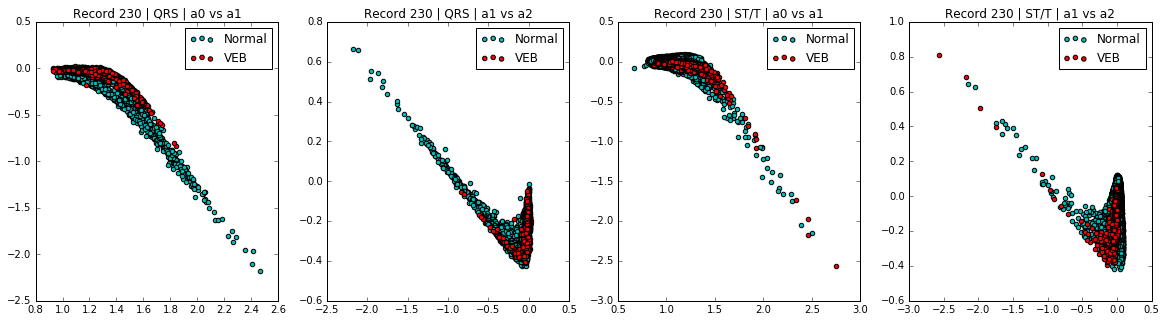

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Check the paper for choosing the lengthes
length_qrs = 40
length_stt = 120

lst = list()

for i in DS1:
    rec_index = i

    # Tweak the use_filter param
    lst.extend(
        extract_features("mitdb/" + rec_index, length_qrs, length_stt, ar_order_qrs=3, ar_order_stt=3, use_filter=True)
    )

df = pd.DataFrame(lst)

if not df.empty and not df[df["type"] == "VEB"].empty and not df[df["type"] == "N"].empty:
    n_qrs_ar_array = series2arCoeffs(df[df["type"] == "N"]["QRS_ar_coeffs"])
    veb_qrs_ar_array = series2arCoeffs(df[df["type"] == "VEB"]["QRS_ar_coeffs"])
    n_stt_ar_array = series2arCoeffs(df[df["type"] == "N"]["ST/T_ar_coeffs"])
    veb_stt_ar_array = series2arCoeffs(df[df["type"] == "VEB"]["ST/T_ar_coeffs"])

    fig = plt.figure(figsize=(20, 5))

    ax1 = fig.add_subplot(141, title="Record {} | QRS | a0 vs a1".format(rec_index))
    ax1.scatter(x=n_qrs_ar_array[:, 0], y=n_qrs_ar_array[:, 1], c='c', label="Normal")
    ax1.scatter(x=veb_qrs_ar_array[:, 0], y=veb_qrs_ar_array[:, 1], c='r', label="VEB")
    plt.legend(loc="best")

    ax2 = fig.add_subplot(142, title="Record {} | QRS | a1 vs a2".format(rec_index))
    ax2.scatter(x=n_qrs_ar_array[:, 1], y=n_qrs_ar_array[:, 2], c='c', label="Normal")
    ax2.scatter(x=veb_qrs_ar_array[:, 1], y=veb_qrs_ar_array[:, 2], c='r', label="VEB")
    plt.legend(loc="best")

    ax3 = fig.add_subplot(143, title="Record {} | ST/T | a0 vs a1".format(rec_index))
    ax3.scatter(x=n_stt_ar_array[:, 0], y=n_stt_ar_array[:, 1], c='c', label="Normal")
    ax3.scatter(x=veb_stt_ar_array[:, 0], y=veb_stt_ar_array[:, 1], c='r', label="VEB")
    plt.legend(loc="best")

    ax4 = fig.add_subplot(144, title="Record {} | ST/T | a1 vs a2".format(rec_index))
    ax4.scatter(x=n_stt_ar_array[:, 1], y=n_stt_ar_array[:, 2], c='c', label="Normal")
    ax4.scatter(x=veb_stt_ar_array[:, 1], y=veb_stt_ar_array[:, 2], c='r', label="VEB")
    plt.legend(loc="best")

else:
    print("Record {} : At least one empty category : VEB or N.".format(rec_index))

Record 101 : At least one empty category : VEB or N.
Record 109 : At least one empty category : VEB or N.
Record 112 : At least one empty category : VEB or N.
Record 115 : At least one empty category : VEB or N.
Record 118 : At least one empty category : VEB or N.
Record 122 : At least one empty category : VEB or N.
Record 124 : At least one empty category : VEB or N.
Record 207 : At least one empty category : VEB or N.
Record 220 : At least one empty category : VEB or N.


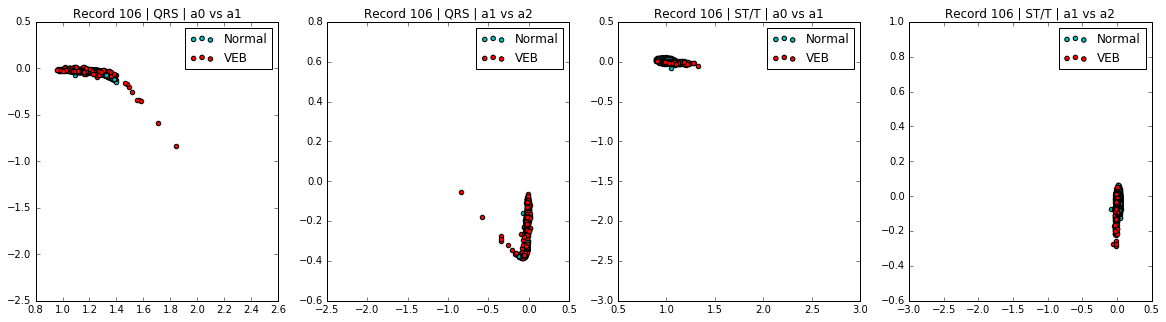

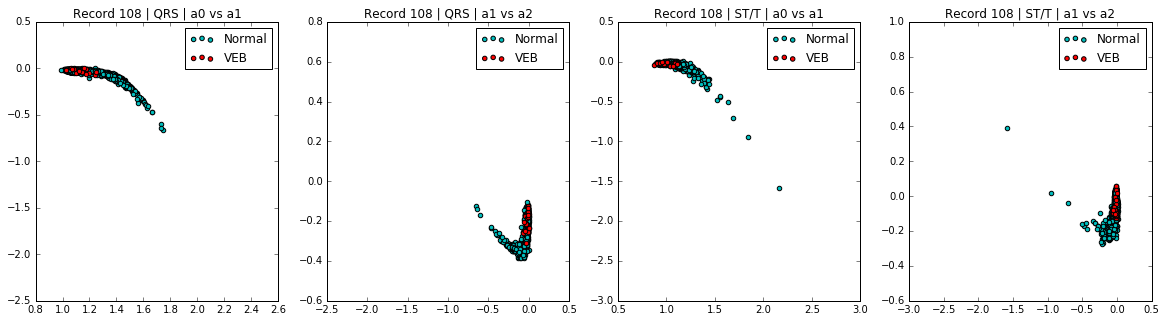

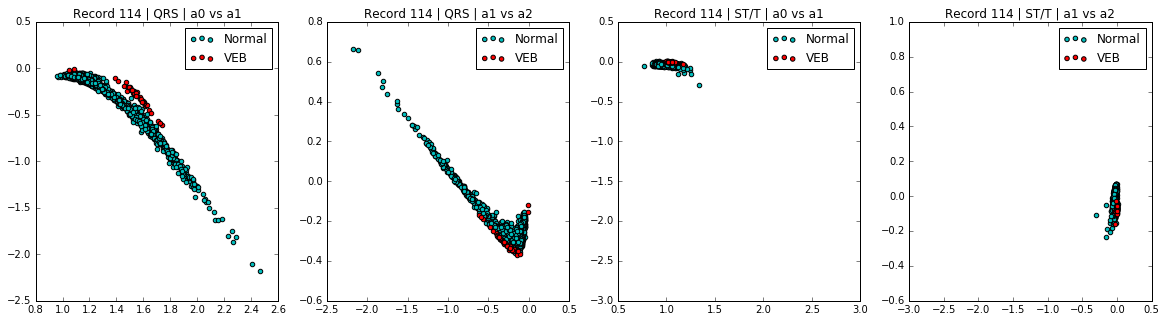

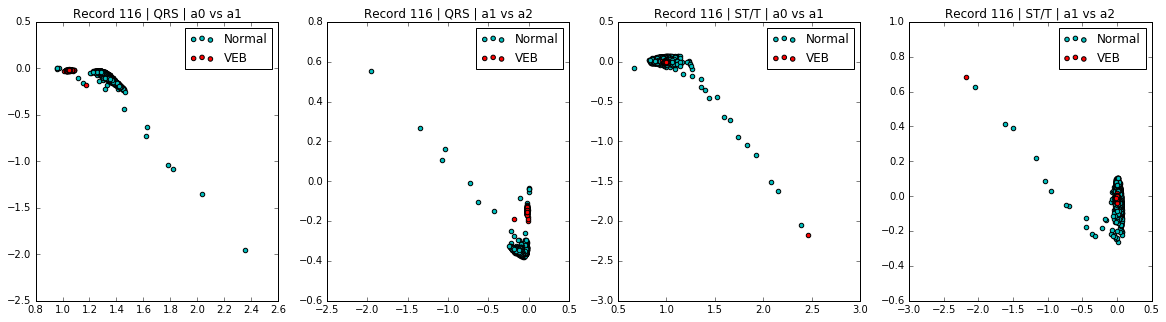

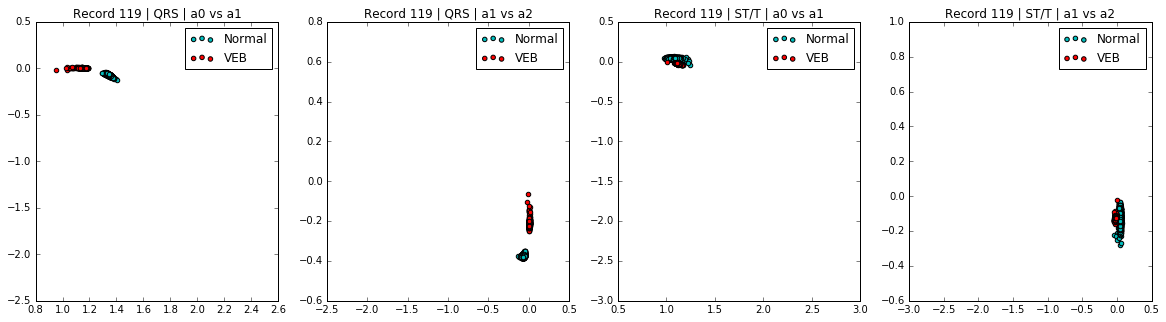

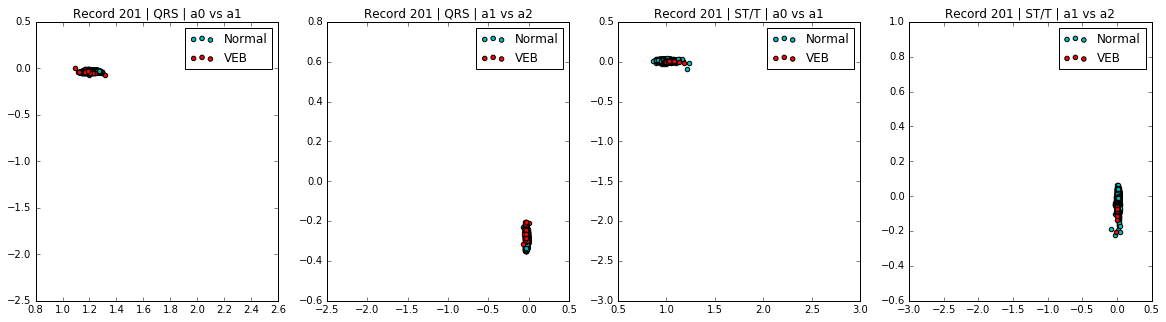

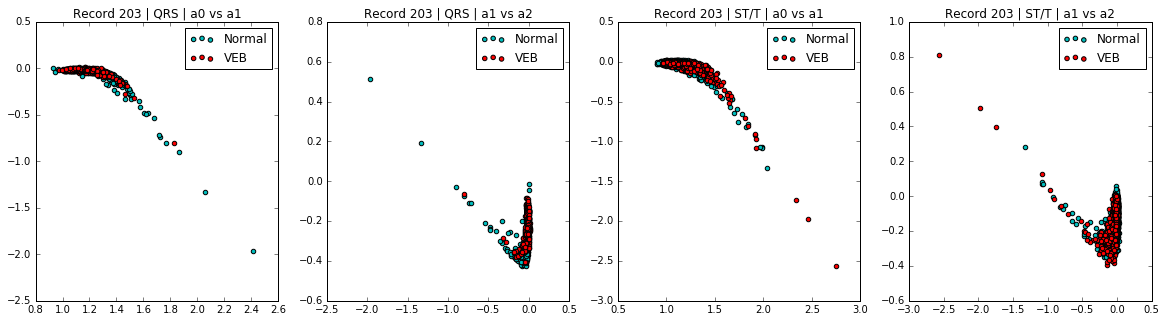

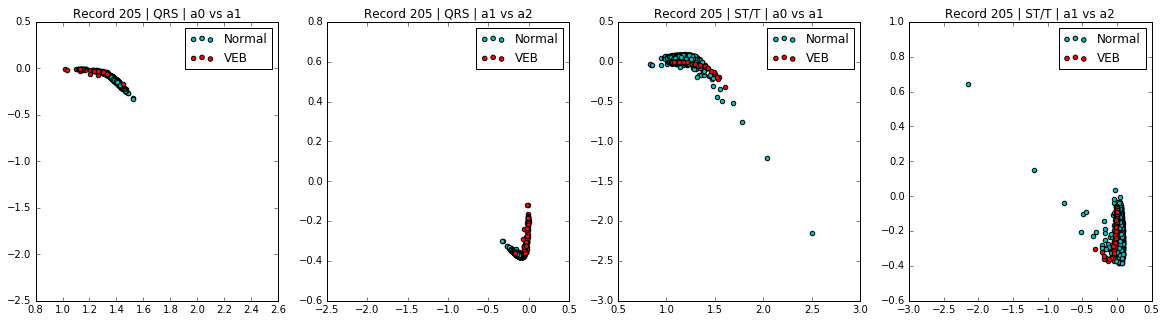

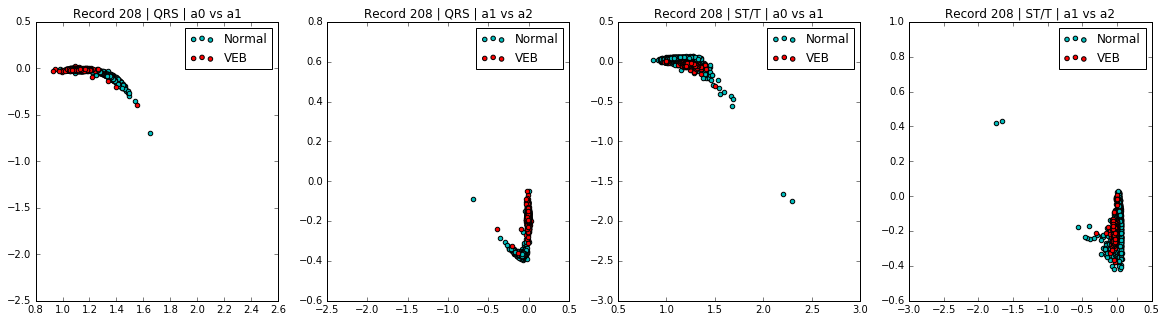

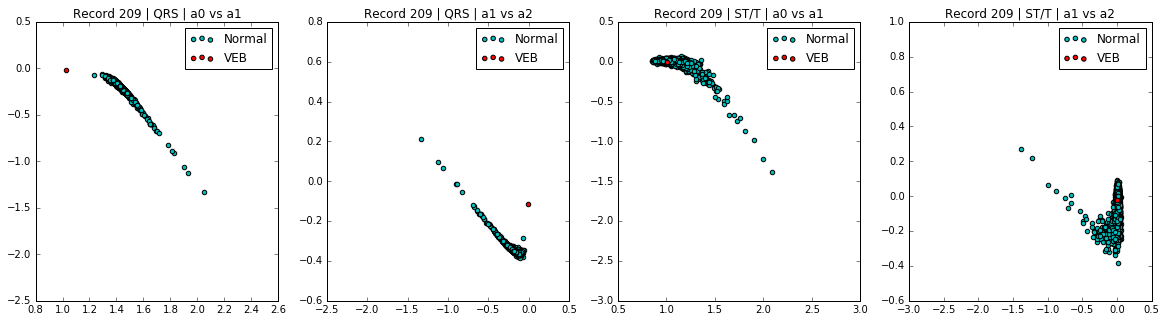

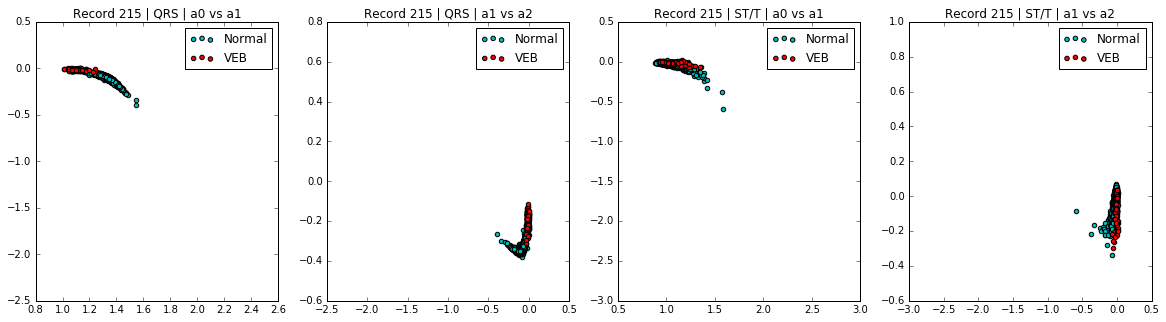

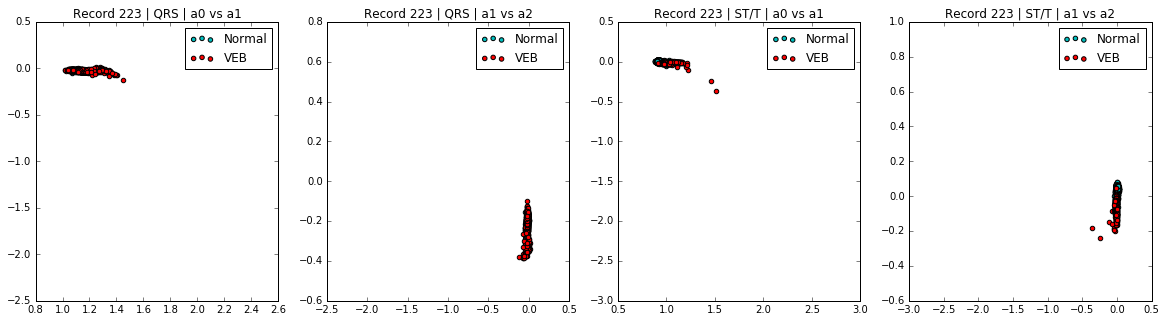

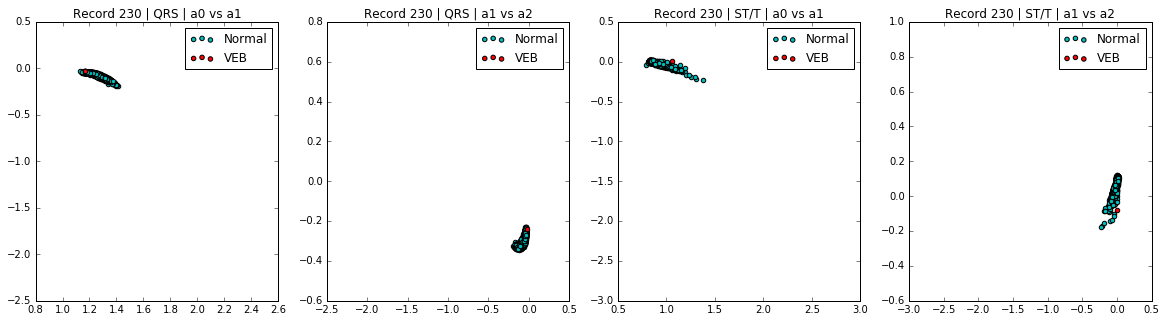

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Check the paper for choosing the lengthes
length_qrs = 40
length_stt = 120

lst = list()

for i in DS1:
    rec_index = i

    # Tweak the use_filter param
    lst = extract_features("mitdb/" + rec_index, length_qrs, length_stt, ar_order_qrs=3, ar_order_stt=3, use_filter=True)

    df = pd.DataFrame(lst)

    if not df.empty and not df[df["type"] == "VEB"].empty and not df[df["type"] == "N"].empty:
        n_pre_rr = df[df["type"] == "N"]["pre-RR"]
        veb_pre_rr = df[df["type"] == "VEB"]["pre-RR"]
        n_post_rr = df[df["type"] == "N"]["post-RR"]
        veb_post_rr = df[df["type"] == "VEB"]["post-RR"]
        
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(121, title="Record {} | Pre-RR")
        ax1.scatter(n_pre_rr, c="c", label="Normal")
        ax1.scatter(veb_pre_rr, c="r", label="VEB")
        
        

        n_qrs_ar_array = series2arCoeffs(df[df["type"] == "N"]["QRS_ar_coeffs"])
        veb_qrs_ar_array = series2arCoeffs(df[df["type"] == "VEB"]["QRS_ar_coeffs"])
        n_stt_ar_array = series2arCoeffs(df[df["type"] == "N"]["ST/T_ar_coeffs"])
        veb_stt_ar_array = series2arCoeffs(df[df["type"] == "VEB"]["ST/T_ar_coeffs"])

        fig = plt.figure(figsize=(20, 5))

        ax1 = fig.add_subplot(141, title="Record {} | QRS | a0 vs a1".format(rec_index))
        plt.ylim(-2.5, 0.5)
        plt.xlim(0.8, 2.6)
        ax1.scatter(x=n_qrs_ar_array[:, 0], y=n_qrs_ar_array[:, 1], c='c', label="Normal")
        ax1.scatter(x=veb_qrs_ar_array[:, 0], y=veb_qrs_ar_array[:, 1], c='r', label="VEB")
        plt.legend(loc="best")

        ax2 = fig.add_subplot(142, title="Record {} | QRS | a1 vs a2".format(rec_index))
        plt.ylim(-0.6, 0.8)
        plt.xlim(-2.5, 0.5)
        ax2.scatter(x=n_qrs_ar_array[:, 1], y=n_qrs_ar_array[:, 2], c='c', label="Normal")
        ax2.scatter(x=veb_qrs_ar_array[:, 1], y=veb_qrs_ar_array[:, 2], c='r', label="VEB")
        plt.legend(loc="best")

        ax3 = fig.add_subplot(143, title="Record {} | ST/T | a0 vs a1".format(rec_index))
        plt.ylim(-3, 0.5)
        plt.xlim(0.5, 3)
        ax3.scatter(x=n_stt_ar_array[:, 0], y=n_stt_ar_array[:, 1], c='c', label="Normal")
        ax3.scatter(x=veb_stt_ar_array[:, 0], y=veb_stt_ar_array[:, 1], c='r', label="VEB")
        plt.legend(loc="best")

        ax4 = fig.add_subplot(144, title="Record {} | ST/T | a1 vs a2".format(rec_index))
        plt.ylim(-0.6, 1)
        plt.xlim(-3, 0.5)
        ax4.scatter(x=n_stt_ar_array[:, 1], y=n_stt_ar_array[:, 2], c='c', label="Normal")
        ax4.scatter(x=veb_stt_ar_array[:, 1], y=veb_stt_ar_array[:, 2], c='r', label="VEB")
        plt.legend(loc="best")

    else:
        print("Record {} : At least one empty category : VEB or N.".format(rec_index))

# c. Model Fitting

In [134]:
import numpy as np
import pandas as pd

# Check the paper for choosing the lengthes
length_qrs = 40
length_stt = 120

lst = list()

for i in DS1:
    rec_index = i

    # Tweak the use_filter param
    lst.extend(
        extract_features("mitdb/" + rec_index, length_qrs, length_stt, ar_order_qrs=3, ar_order_stt=3, use_filter=True)
    )

df = pd.DataFrame(lst)
df.dropna(inplace=True)

y = df["type"].values

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X = df[df.columns[2:]].values
X = scale(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Imbalanced Data Problem

In [128]:
print("Number of Normals : {}".format(df[df["type"] == 0].shape[0]))
print("Number of VEBs    : {}".format(df[df["type"] == 1].shape[0]))

Number of Normals : 38086
Number of VEBs    : 3683


### Start

In [161]:
from sklearn.svm import SVC

clf = SVC(class_weight="balanced")
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

In [162]:
my_metrics(y_test, y_predict)

Accuracy  : 0.9604979650466843
Precision : 0.6972920696324951
Recall    : 0.9769647696476965


In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def my_metrics(y_true, y_pred):
    print("Accuracy  : {}".format(accuracy_score(y_true, y_pred)))
    print("Precision : {}".format(precision_score(y_true, y_pred)))
    print("Recall    : {}".format(recall_score(y_true, y_pred)))